# Notebook E-tivity 3 CE4021 Task 1

Student name: Pierce Currid

Student ID: 23260092

<hr style=\"border:2px solid gray\"> </hr>

## Imports

In [19]:
import numpy as np
import math
import random
import matplotlib.pyplot as plt

 If you believe required imports are missing, please contact your moderator.

<hr style=\"border:2px solid gray\"> </hr>

## Task 1

### Option Height:
#### <i>Observing the average height of customers of a theme park to establish the mean and standard deviation.</i>

Numerous natural phenomena are normally distributed, including height within a population. Normal distribution is usually associated with the prototypical bell curve. It is continuous probability distribution.
Heights aren't normally distributed, but the central limit theorem sheds some light here, and explains why.
The example of coin flipping helps - if you flip a coin once, the distribution of the probable number of heads would not be a normal distribution (you'd have .5 probability of getting head/tail ). If you scale up to 50,100,1000,..n tosses of the coin, the probability starts to look normally distributed. So as we start to scale out, the bell curve attributes start to show themselves. Height can be represented as a continuous random variable.

The <b>central limit theorem (CLT)</b> explains this by stating:<br> 
<i>as n increases, the distribution of the sample mean or sum approaches a normal distribution.</i>


#### Standard Deviation $\sigma$:  
is the spread of a group of numbers/datapoints from the mean. In other words, how far apart number/data are within a dataset. This value is calculated as the square root of the variance (which is the average of the squared differences from the mean).

#### Mean $\mu$: 
is a central value of a set of numbers/datapoints. In other words, the average.  In normal distribution terms it's the peak in the bell curve. 

### Experiments

For this experiment, I'm going to try and keep it local and use the example of Funderland, which is an amusement park event that takes place in Dublin from Stephens Day (the day after Christmas) up until early/mid January. Now, there will of course be some inherent bias in the dataset as I'm using what I think make up the population of the event each day - mainly families and younger teenagers. These 2 cohorts will inform the heights that will build the mean and standard deviation values, that will in turn build the sample populations using the random module. Given the wide range of teenager ages and heights, it'll be very difficult to approximate this. Hence the mean will be calculated using male/female adult and male/female children heights with a 25% split for each. See calculations below. 

In terms of attendence numbers, some newspaper articles mention ~200,000 attendence over the 10 days, so I'll pick a population sample of 20,000 to cover the mean, along with a spike of 30,000, and a smaller day of 3500.

The data source I'll use for mean heights and standard deviations for children and adults is https://ncdrisc.org/index.html which comprises of 800 health scientists worldwide, and regularly publish work to eLife. This page shows the mean and deviation of children aged 5yrs old across the world, including Ireland:
https://ncdrisc.org/height-mean-ranking.html

This is fascinating btw https://ncdrisc.org/height-mean-distribution.html the slider shows the increase in height over the years. As is this projection of school aged kids height in 2181 https://www.thelancet.com/journals/lancet/article/PIIS0140-6736(20)31859-6/fulltext#seccestitle130

These sources don't report standard deviation so I'm going to enter in 5 for children and 7 for adults.

female children (5yr olds) = 114cm (range 112 - 115)

male children (5yr olds) = 115cm (range 113 - 117)

female adults = 164cm (162 - 166)

male adults = 178cm (range 176 - 181)

The mean and standard deviation will be built from the above measurements.

<b>Mean  $\mu$</b> = (114 + 115 + 164 + 178)/4 = <b>142.75</b>

<b>Standard deviation $\sigma$</b> = (5 + 7)/2 = <b>6</b>



In [20]:
def sample_population(size: int, mean: int, standard_dev: int):
    """function to build a sample population to allow us to observe avg heights within a themepark"""
    
    sample_pop = []
    for i in range(size):
        sample_pop.append(round(np.random.normal(mean, standard_dev)))
    
    return sample_pop
    
def plot_graph(sample_population: list, title: str):
    """builds a histogram to show the population data with inputs of sample population, bin count, and title"""
    built_bins = np.histogram_bin_edges(sample_population, bins='fd')
    plt.title(title)
    plt.hist(sample_population, bins = built_bins)
    plt.xlabel("Average height")
    plt.grid()
    plt.show()

def population_mean(population: list):
        """returns the mean of a dataset if there's 2 of more to get the mean from"""
        return np.mean(population)
    
def population_standard_dev(population: list):
        """returns the mean of a dataset if there's 2 of more to get the mean from"""
        return np.std(population)

def run_experiment(size: int, title: str):
    mean = 142.75
    standard_dev = 6
    population = sample_population(size, mean, standard_dev)
    plot_graph(population, title)
    mean_exp = round(population_mean(population),3)
    std_exp = round(population_standard_dev(population),3)
    print(f"For a population of size {str(len(population))} the mean is {str(mean_exp)} and the standard deviation is is {str(std_exp)}")
    print(f"Mean difference of {round((mean - mean_exp),3)} between calculated and experiment values")
    print(f"Standard Deviation difference of {round((standard_dev - std_exp),3)} between calculated and experiment values")
    print("------------------------------------------------------------------------------------------------")
    

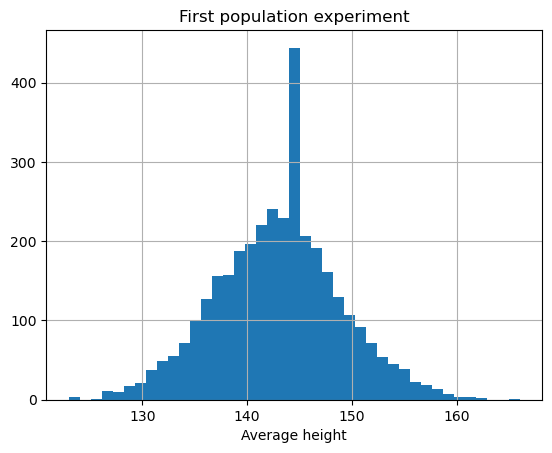

For a population of size 3500 the mean is 142.935 and the standard deviation is is 6.035
Mean difference of -0.185 between calculated and experiment values
Standard Deviation difference of -0.035 between calculated and experiment values
------------------------------------------------------------------------------------------------


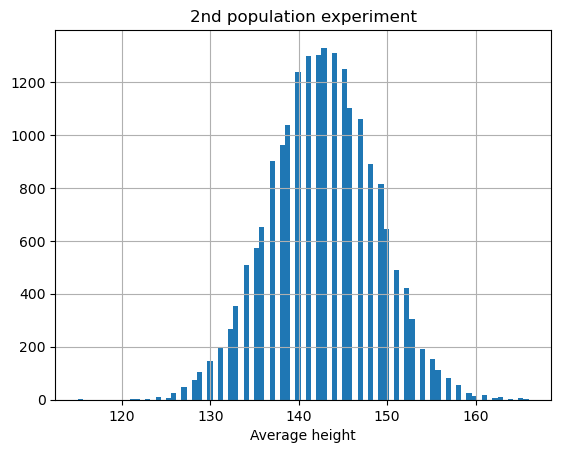

For a population of size 20000 the mean is 142.708 and the standard deviation is is 5.997
Mean difference of 0.042 between calculated and experiment values
Standard Deviation difference of 0.003 between calculated and experiment values
------------------------------------------------------------------------------------------------


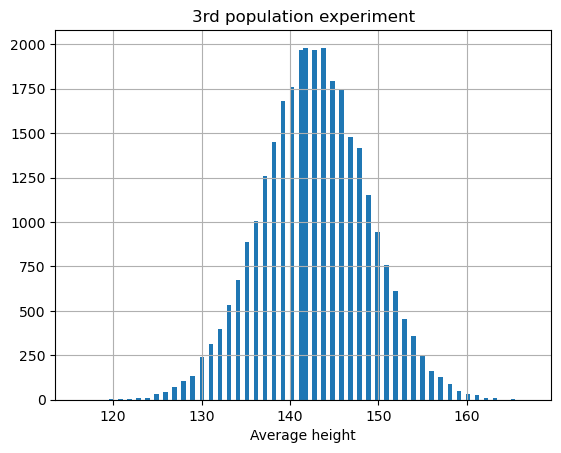

For a population of size 30000 the mean is 142.726 and the standard deviation is is 6.04
Mean difference of 0.024 between calculated and experiment values
Standard Deviation difference of -0.04 between calculated and experiment values
------------------------------------------------------------------------------------------------


In [21]:


run_experiment(3500,'First population experiment')   
run_experiment(20000,'2nd population experiment')
run_experiment(30000, '3rd population experiment')

<hr style=\"border:2px solid gray\"> </hr>

## Reflection

As the sample size increased, there was a normalising of the shape of the graph towards it representing a prototypical bell curve. 
This is in line with the <b>central limit theorem (CLT)</b>
(<i>as n increases, the distribution of the sample mean or sum approaches a normal distribution.</i>)

We can see this in the differences between the calculated and experimentally obtained mean/standard deviation. 
In the smallest sample size of 3,500, there is quite a difference between the standard deviation, less so with the mean.
This decreases with the sample size of 20,000, and again with the sample size of 30,000.

Another observation not strictly related to the experiment, but to how to choose the number of bins, is that the different bin estimators out there can vary depending on the dataset size. Stone trigged warnings that the number of bins was sub-optimal, and the majority of the other built-in bin estimators available within numpy histogran bin edges function look a bit bare with the size of the dataset I use. Auto and fd (Freedman Diaconis) worked best with my 3 datasets

